# Stanton Murillo Transport Validation and Improved XC Correction

[1] "Ionic transport in high-energy-density matter"  [10.1103/PhysRevE.93.043203](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.93.043203)

[2]"Efficient model for electronic transport in high energy-density matter "  [https://doi.org/10.1063/5.0048162](https://doi.org/10.1063/5.0048162)

[3]"Rapid ..." [https:...]

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv

import SMT.core.transport as SMT
from SMT.core.physical_constants import *
from SMT.core.physical_parameters import rs_from_n

import matplotlib.pyplot as plt
import matplotlib as mpl

from cycler import cycler


mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100

## Define Useful transport function

In [4]:
def get_transport_functions(Z, A, ni_cc, xc_type=None):

    if xc_type==None:
        smt = SMT.TransportProperties(1, np.array([m_amu*A]), np.array([Z]), np.array([1*eV_to_AU, 1*eV_to_AU ]), np.array([ni_cc])*invcc_to_AU, improved_xc_SMT=False)
    else:
        smt = SMT.TransportProperties(1, np.array([m_amu*A]), np.array([Z]), np.array([1*eV_to_AU, 1*eV_to_AU ]), np.array([ni_cc])*invcc_to_AU, improved_xc_SMT=True, xc_type='PDW')


    # All out in cgs
    @np.vectorize
    def ηSMT(T_eV):
        T_AU = T_eV*eV_to_AU
        smt.T_array = np.array([T_AU, T_AU])
        return smt.viscosity()*AU_to_g*AU_to_invcc*AU_to_cm**2/AU_to_s
    
    @np.vectorize
    def ηGBI(T_eV):
        yvm = YVM(smt.mi_array*AU_to_g, smt.mi_array*AU_to_g*smt.ni_array*AU_to_invcc, T_eV, Z, units_out='cgs')
        return yvm.viscosity_GBI()
    
    @np.vectorize
    def ηYVM(T_eV):
        yvm = YVM(smt.mi_array*AU_to_g, smt.mi_array*AU_to_g*smt.ni_array*AU_to_invcc, T_eV, Z, units_out='cgs')
        return yvm.viscosity_YVM()

    @np.vectorize
    def κiSMT(T_eV):
        T_AU = T_eV*eV_to_AU
        smt.T_array = np.array([T_AU, T_AU])
        return smt.κi* AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)
 
    @np.vectorize
    def κeSMT(T_eV):
        T_AU = T_eV*eV_to_AU
        smt.T_array = np.array([T_AU, T_AU])
        return smt.κee* AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)
    
    @np.vectorize
    def σeSMT(T_eV):
        T_AU = T_eV*eV_to_AU
        smt.T_array = np.array([T_AU, T_AU])
        return smt.σ* AU_to_Siemens/AU_to_cm
    
    @np.vectorize
    def λeff(T_eV):
        T_AU = T_eV*eV_to_AU
        smt.T_array = np.array([T_AU, T_AU])
        return smt.λeff

    @np.vectorize
    def λeff(T_eV):
        T_AU = T_eV*eV_to_AU
        smt.T_array = np.array([T_AU, T_AU])
        return smt.λeff

    
    #return ηSMT, ηGBI, ηYVM, κiSMT, κeSMT, σeSMT
    return λeff

# H
Z, A = 1, 1.00784
ρi_gpercc  = 1
ni_cc = ρi_gpercc/(m_amu*A*AU_to_g)

λ_SMT_H = get_transport_functions(Z,A,ni_cc)
λ_SMTPDW_H = get_transport_functions(Z,A,ni_cc, xc_type='PDW')

# C
Z, A = 6, 12.011
ρi_gpercc  = 10
ni_cc = ρi_gpercc/(m_amu*A*AU_to_g)

λ_SMT_C = get_transport_functions(Z,A,ni_cc)
λ_SMTPDW_C = get_transport_functions(Z,A,ni_cc, xc_type='PDW')

# Al
Z, A = 13, 26.981539
ρi_gpercc  = 2.7
ni_cc = ρi_gpercc/(m_amu*A*AU_to_g)

λ_SMT_Al = get_transport_functions(Z,A,ni_cc)
λ_SMTPDW_Al = get_transport_functions(Z,A,ni_cc, xc_type='PDW')

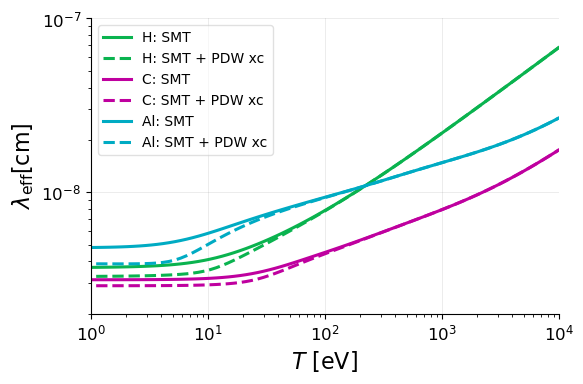

In [12]:
fig, ax = plt.subplots( figsize=(6,4), facecolor='white')

T_AU_list = np.geomspace(1e-1,1e4,num=100)*eV_to_AU


colors = ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851']
# H
ax.plot(T_AU_list*AU_to_eV, λ_SMT_H(T_AU_list*AU_to_eV)*AU_to_cm, color=colors[0], label='H: SMT')
ax.plot(T_AU_list*AU_to_eV, λ_SMTPDW_H(T_AU_list*AU_to_eV)*AU_to_cm, color=colors[0], linestyle='--', label='H: SMT + PDW xc')

# C
ax.plot(T_AU_list*AU_to_eV, λ_SMT_C(T_AU_list*AU_to_eV)*AU_to_cm, color=colors[1], label='C: SMT')
ax.plot(T_AU_list*AU_to_eV, λ_SMTPDW_C(T_AU_list*AU_to_eV)*AU_to_cm,color=colors[1], linestyle='--',  label='C: SMT + PDW xc')

# Al
ax.plot(T_AU_list*AU_to_eV, λ_SMT_Al(T_AU_list*AU_to_eV)*AU_to_cm, color=colors[2], label='Al: SMT')
ax.plot(T_AU_list*AU_to_eV, λ_SMTPDW_Al(T_AU_list*AU_to_eV)*AU_to_cm, color=colors[2], linestyle='--', label='Al: SMT + PDW xc')

ax.set_ylabel(r"$\lambda_{\rm eff} $[cm]")
ax.set_xlabel(r"$T$ [eV]")


ax.set_ylim(2e-9,1e-7)
ax.set_xlim(1,1e4)
# Scales
ax.set_yscale('log')
ax.set_xscale('log')

# Legend
ax.legend()

plt.tight_layout()
plt.savefig("λeff_xc_plot.png", dpi=400)
